In [2]:

#  STEP 1: Load Libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.utils import resample


In [3]:
#   Upload Dataset
file_path = "/content/CSMS.xlsx"
df = pd.read_excel(file_path)


In [4]:
# Drop 'Understanding' column
if 'Understanding' in df.columns:
    df = df.drop(columns=['Understanding'])
    print("✅ 'Understanding' column removed.")


✅ 'Understanding' column removed.


In [5]:
#  Clean column names
df.columns = df.columns.str.strip()

In [6]:
#   Remove rows having >=4 zeros
input_cols = [
    "Course overview", "Reading file", "Abstract materiale", "Concrete material",
    "Visual Materials", "Self-assessment", "Exercises submit", "Quiz submitted",
    "playing", "paused", "unstarted", "buffering"
]

def should_delete(row):
    zero_count = (row[input_cols] == 0).sum()
    return zero_count >= 4

df_cleaned = df[~df.apply(should_delete, axis=1)].reset_index(drop=True)


In [7]:
#   Split labelled and unlabelled
labelled_data = df_cleaned[df_cleaned["Processing"].notnull()].copy()
unlabelled_data = df_cleaned[df_cleaned["Processing"].isnull()].copy()

X_labelled = labelled_data[input_cols]
y_labelled = labelled_data[["Processing", "Perception", "Input"]]
#   Encode targets
encoders = {}
y_encoded = pd.DataFrame()

for col in y_labelled.columns:
    le = LabelEncoder()
    y_encoded[col] = le.fit_transform(y_labelled[col])
    encoders[col] = le
    #   Scale input
scaler = StandardScaler()
X_labelled_scaled = scaler.fit_transform(X_labelled)
#  Balance dataset (upsample minority classes)
df_balanced = pd.DataFrame(X_labelled_scaled, columns=input_cols)
df_balanced['Processing'] = y_encoded["Processing"]

max_size = df_balanced['Processing'].value_counts().max()

lst = [df_balanced]
for class_index, group in df_balanced.groupby('Processing'):
    lst.append(group.sample(max_size - len(group), replace=True, random_state=42))

df_balanced = pd.concat(lst).reset_index(drop=True)

X_balanced = df_balanced[input_cols]
y_balanced = df_balanced['Processing']
#   Split Balanced Data
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)
#   Define 10 Models
models = {
    "RandomForest": RandomForestClassifier(),
    "XGBoost": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Bagging": BaggingClassifier(),
    "ExtraTrees": ExtraTreesClassifier(),
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "NaiveBayes": GaussianNB(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "DecisionTree": DecisionTreeClassifier()
}

results = {}
#   Train and Evaluate Models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average="weighted")
    cm = confusion_matrix(y_test, y_pred)

    results[name] = {
        "Accuracy": acc,
        "F1 Score": f1,
        "Confusion Matrix": cm
    }
#  STEP 12: Show results
results_df = pd.DataFrame(results).T
print(results_df)

                    Accuracy  F1 Score      Confusion Matrix
RandomForest        0.574074  0.573034  [[19, 11], [12, 12]]
XGBoost             0.592593  0.590307  [[20, 10], [12, 12]]
AdaBoost            0.462963  0.463892  [[15, 15], [14, 10]]
Bagging              0.62963   0.62001   [[23, 7], [13, 11]]
ExtraTrees          0.537037  0.532628  [[19, 11], [14, 10]]
LogisticRegression  0.518519  0.515873   [[13, 17], [9, 15]]
NaiveBayes          0.462963  0.445917    [[9, 21], [8, 16]]
SVM                 0.555556  0.555556   [[15, 15], [9, 15]]
KNN                 0.518519  0.518519  [[17, 13], [13, 11]]
DecisionTree        0.611111  0.611784  [[19, 11], [10, 14]]


In [8]:
#   Split labelled and unlabelled
labelled_data = df_cleaned[df_cleaned["Perception"].notnull()].copy()
unlabelled_data = df_cleaned[df_cleaned["Perception"].isnull()].copy()

X_labelled = labelled_data[input_cols]
y_labelled = labelled_data[["Processing", "Perception", "Input"]]
#   Encode targets
encoders = {}
y_encoded = pd.DataFrame()

for col in y_labelled.columns:
    le = LabelEncoder()
    y_encoded[col] = le.fit_transform(y_labelled[col])
    encoders[col] = le
    #   Scale input
scaler = StandardScaler()
X_labelled_scaled = scaler.fit_transform(X_labelled)
#  Balance dataset (upsample minority classes)
df_balanced = pd.DataFrame(X_labelled_scaled, columns=input_cols)
df_balanced['Perception'] = y_encoded["Perception"]

max_size = df_balanced['Perception'].value_counts().max()

lst = [df_balanced]
for class_index, group in df_balanced.groupby('Perception'):
    lst.append(group.sample(max_size - len(group), replace=True, random_state=42))

df_balanced = pd.concat(lst).reset_index(drop=True)

X_balanced = df_balanced[input_cols]
y_balanced = df_balanced['Perception']
#   Split Balanced Data
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)
#   Define 10 Models
models = {
    "RandomForest": RandomForestClassifier(),
    "XGBoost": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Bagging": BaggingClassifier(),
    "ExtraTrees": ExtraTreesClassifier(),
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "NaiveBayes": GaussianNB(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "DecisionTree": DecisionTreeClassifier()
}

results = {}
#   Train and Evaluate Models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average="weighted")
    cm = confusion_matrix(y_test, y_pred)

    results[name] = {
        "Accuracy": acc,
        "F1 Score": f1,
        "Confusion Matrix": cm
    }
#  STEP 12: Show results
results_df = pd.DataFrame(results).T
print(results_df)

                    Accuracy  F1 Score      Confusion Matrix
RandomForest        0.636364  0.633939   [[15, 12], [8, 20]]
XGBoost             0.472727   0.47168  [[14, 13], [16, 12]]
AdaBoost            0.618182  0.617929  [[16, 11], [10, 18]]
Bagging             0.636364  0.634917   [[19, 8], [12, 16]]
ExtraTrees          0.672727  0.668109   [[15, 12], [6, 22]]
LogisticRegression  0.490909  0.490909  [[13, 14], [14, 14]]
NaiveBayes          0.472727  0.470624  [[11, 16], [13, 15]]
SVM                 0.618182  0.616659   [[15, 12], [9, 19]]
KNN                 0.618182  0.617423   [[18, 9], [12, 16]]
DecisionTree        0.709091  0.707152   [[17, 10], [6, 22]]


In [9]:

#   Split labelled and unlabelled
labelled_data = df_cleaned[df_cleaned["Input"].notnull()].copy()
unlabelled_data = df_cleaned[df_cleaned["Input"].isnull()].copy()

X_labelled = labelled_data[input_cols]
y_labelled = labelled_data[["Processing", "Perception", "Input"]]
#   Encode targets
encoders = {}
y_encoded = pd.DataFrame()

for col in y_labelled.columns:
    le = LabelEncoder()
    y_encoded[col] = le.fit_transform(y_labelled[col])
    encoders[col] = le
    #   Scale input
scaler = StandardScaler()
X_labelled_scaled = scaler.fit_transform(X_labelled)
#  Balance dataset (upsample minority classes)
df_balanced = pd.DataFrame(X_labelled_scaled, columns=input_cols)
df_balanced['Input'] = y_encoded["Input"]

max_size = df_balanced['Input'].value_counts().max()

lst = [df_balanced]
for class_index, group in df_balanced.groupby('Input'):
    lst.append(group.sample(max_size - len(group), replace=True, random_state=42))

df_balanced = pd.concat(lst).reset_index(drop=True)

X_balanced = df_balanced[input_cols]
y_balanced = df_balanced['Input']
#   Split Balanced Data
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)
#   Define 10 Models
models = {
    "RandomForest": RandomForestClassifier(),
    "XGBoost": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Bagging": BaggingClassifier(),
    "ExtraTrees": ExtraTreesClassifier(),
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "NaiveBayes": GaussianNB(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "DecisionTree": DecisionTreeClassifier()
}

results = {}
#   Train and Evaluate Models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average="weighted")
    cm = confusion_matrix(y_test, y_pred)

    results[name] = {
        "Accuracy": acc,
        "F1 Score": f1,
        "Confusion Matrix": cm
    }
#  STEP 12: Show results
results_df = pd.DataFrame(results).T
print(results_df)

                    Accuracy  F1 Score      Confusion Matrix
RandomForest        0.988235  0.988245    [[45, 1], [0, 39]]
XGBoost             0.905882  0.905778    [[38, 8], [0, 39]]
AdaBoost            0.694118  0.693347  [[34, 12], [14, 25]]
Bagging             0.929412   0.92947    [[40, 6], [0, 39]]
ExtraTrees               1.0       1.0    [[46, 0], [0, 39]]
LogisticRegression  0.541176  0.541176  [[23, 23], [16, 23]]
NaiveBayes          0.517647  0.499272  [[32, 14], [27, 12]]
SVM                 0.741176  0.737642   [[28, 18], [4, 35]]
KNN                 0.705882  0.704087   [[28, 18], [7, 32]]
DecisionTree        0.905882  0.905778    [[38, 8], [0, 39]]


In [10]:
#   Label Unlabeled Data using Semi-supervised learning
from sklearn.semi_supervised import SelfTrainingClassifier

#  Prepare Unlabeled data inputs
X_unlabelled = unlabelled_data[input_cols]
X_unlabelled_scaled = scaler.transform(X_unlabelled)

#  Combine labelled + unlabelled
X_combined = np.vstack((X_labelled_scaled, X_unlabelled_scaled))

# Prepare y_combined
y_combined = np.concatenate((y_encoded["Processing"], [-1]*len(X_unlabelled_scaled)))

#  Use best model → RandomForest as base
base_model = RandomForestClassifier()

#  Create Self Training Model
self_training_model = SelfTrainingClassifier(base_model)
self_training_model.fit(X_combined, y_combined)

#  Predict pseudo-labels for unlabelled
pseudo_labels = self_training_model.predict(X_unlabelled_scaled)

#  Decode labels to original (reverse transform)
pseudo_labels_decoded = encoders["Processing"].inverse_transform(pseudo_labels)

#  Add predicted labels to unlabelled_data
unlabelled_data["Predicted Processing"] = pseudo_labels_decoded

#  Show final labelled unlabelled data
print(unlabelled_data[["id", "Predicted Processing"]].head(20))


            id Predicted Processing
249  0140HJ399                  REF
250  0150FK726                  ACT
251  0150LJ813                  ACT
252  0155JC081                  REF
253  0155CZ525                  ACT
254  0156RY050                  REF
255  0156RF202                  REF
256  0160RK011                  ACT
257  0160VV733                  REF
258  0161NU077                  REF
259  0161BL377                  ACT
260  0161NW602                  ACT
261  0162RO310                  ACT
262  0164BU032                  REF
263  0164AL184                  REF
264  0164FI314                  ACT
265  0165ER301                  ACT
266  0165CD991                  ACT
267  0166MH317                  ACT
268  0167GE103                  ACT


In [11]:
unlabelled_data.to_csv("Unlabelled_with_Predicted_LabelsProcessing.csv", index=False)
print("Saved as CSV.")


Saved as CSV.


In [12]:
#  Label Unlabeled Data using Semi-supervised learning
from sklearn.semi_supervised import SelfTrainingClassifier

#  Prepare Unlabeled data inputs
X_unlabelled = unlabelled_data[input_cols]
X_unlabelled_scaled = scaler.transform(X_unlabelled)

#  Combine labelled + unlabelled
X_combined = np.vstack((X_labelled_scaled, X_unlabelled_scaled))

# Prepare y_combined
y_combined = np.concatenate((y_encoded["Perception"], [-1]*len(X_unlabelled_scaled)))

#  Use best model → RandomForest as base
base_model = RandomForestClassifier()

#  Create Self Training Model
self_training_model = SelfTrainingClassifier(base_model)
self_training_model.fit(X_combined, y_combined)

#  Predict pseudo-labels for unlabelled
pseudo_labels = self_training_model.predict(X_unlabelled_scaled)

#  Decode labels to original (reverse transform)
pseudo_labels_decoded = encoders["Perception"].inverse_transform(pseudo_labels)

#  Add predicted labels to unlabelled_data
unlabelled_data["Predicted Perception"] = pseudo_labels_decoded

#  Show final labelled unlabelled data
print(unlabelled_data[["id", "Predicted Perception"]].head(20))
unlabelled_data.to_csv("Unlabelled_with_Predicted_LabelsPerception.csv", index=False)
print("Saved as CSV.")



            id Predicted Perception
249  0140HJ399                  SEN
250  0150FK726                  SEN
251  0150LJ813                  SEN
252  0155JC081                  SEN
253  0155CZ525                  SEN
254  0156RY050                  SEN
255  0156RF202                  SEN
256  0160RK011                  SEN
257  0160VV733                  SEN
258  0161NU077                  SEN
259  0161BL377                  INT
260  0161NW602                  SEN
261  0162RO310                  SEN
262  0164BU032                  INT
263  0164AL184                  SEN
264  0164FI314                  INT
265  0165ER301                  SEN
266  0165CD991                  SEN
267  0166MH317                  SEN
268  0167GE103                  SEN
Saved as CSV.


In [13]:
#   Label Unlabeled Data using Semi-supervised learning
from sklearn.semi_supervised import SelfTrainingClassifier

#  Prepare Unlabeled data inputs
X_unlabelled = unlabelled_data[input_cols]
X_unlabelled_scaled = scaler.transform(X_unlabelled)

#  Combine labelled + unlabelled
X_combined = np.vstack((X_labelled_scaled, X_unlabelled_scaled))

# Prepare y_combined
y_combined = np.concatenate((y_encoded["Input"], [-1]*len(X_unlabelled_scaled)))

#  Use best model → RandomForest as base
base_model = RandomForestClassifier()

#  Create Self Training Model
self_training_model = SelfTrainingClassifier(base_model)
self_training_model.fit(X_combined, y_combined)

#  Predict pseudo-labels for unlabelled
pseudo_labels = self_training_model.predict(X_unlabelled_scaled)

#  Decode labels to original (reverse transform)
pseudo_labels_decoded = encoders["Input"].inverse_transform(pseudo_labels)

#  Add predicted labels to unlabelled_data
unlabelled_data["Predicted Input"] = pseudo_labels_decoded

#  Show final labelled unlabelled data
print(unlabelled_data[["id", "Predicted Input"]].head(20))
unlabelled_data.to_csv("Unlabelled_with_Predicted_LabelsInput.csv", index=False)
print("Saved as CSV.")


            id Predicted Input
249  0140HJ399             VIS
250  0150FK726             VIS
251  0150LJ813             VIS
252  0155JC081             VIS
253  0155CZ525             VIS
254  0156RY050             VIS
255  0156RF202             VIS
256  0160RK011             VIS
257  0160VV733             VIS
258  0161NU077             VIS
259  0161BL377             VIS
260  0161NW602             VIS
261  0162RO310             VIS
262  0164BU032             VIS
263  0164AL184             VIS
264  0164FI314             VIS
265  0165ER301             VIS
266  0165CD991             VIS
267  0166MH317             VIS
268  0167GE103             VIS
Saved as CSV.


In [14]:
# INSTALL LIBRARY
!pip install imbalanced-learn

# IMPORT LIBRARIES
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from imblearn.over_sampling import SMOTE
from collections import Counter

# DEFINE FILES AND TARGET COLUMN NAMES
files_targets = {
    "Unlabelled_with_Predicted_LabelsProcessing.csv": "Predicted Processing",
    "Unlabelled_with_Predicted_LabelsPerception.csv": "Predicted Perception",
    "Unlabelled_with_Predicted_LabelsInput.csv": "Predicted Input"
}

# INPUT COLUMNS
input_cols = ["Course overview", "Reading file", "Abstract materiale", "Concrete material",
              "Visual Materials", "Self-assessment", "Exercises submit", "Quiz submitted",
              "playing", "paused", "unstarted", "buffering"]

# TO STORE ALL RESULTS
final_results = {}

# LOOP THROUGH EACH FILE AND TRAIN MODELS
for file, target_column in files_targets.items():
    print("\n=============================")
    print(" FILE:", file, "| TARGET:", target_column)
    print("=============================")

    # Load data
    df = pd.read_csv("/content/" + file)

    # Prepare input and target
    X = df[input_cols]
    y = df[target_column]

    # Encode target
    le = LabelEncoder()
    y_encoded = le.fit_transform(y)

    # Scale inputs
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Check class counts
    class_counts = Counter(y_encoded)
    min_class_size = min(class_counts.values())

    # Apply SMOTE only if smallest class has > 5 samples
    if min_class_size > 5:
        smote = SMOTE(random_state=42)
        X_balanced, y_balanced = smote.fit_resample(X_scaled, y_encoded)
        print("✅ SMOTE Applied → Class Distribution:", np.bincount(y_balanced))
    else:
        X_balanced, y_balanced = X_scaled, y_encoded
        print("⚠️ SMOTE Skipped → Not enough samples in smallest class:", min_class_size)

    # Split
    X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

    # Define Models
    models = {
        "RandomForest": RandomForestClassifier(),
        "XGBoost": GradientBoostingClassifier(),
        "AdaBoost": AdaBoostClassifier(),
        "Bagging": BaggingClassifier(),
        "ExtraTrees": ExtraTreesClassifier(),
        "LogisticRegression": LogisticRegression(max_iter=1000),
        "NaiveBayes": GaussianNB(),
        "SVM": SVC(),
        "KNN": KNeighborsClassifier(),
        "DecisionTree": DecisionTreeClassifier()
    }

    results = {}

    # Train + Evaluate Models
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        acc = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average="weighted")
        cm = confusion_matrix(y_test, y_pred)

        results[name] = {
            "Accuracy": acc,
            "F1 Score": f1,
            "Confusion Matrix": cm
        }

    # Save Result
    results_df = pd.DataFrame(results).T
    final_results[target_column] = results_df

# FINAL SEPARATE PRINTING
for target, result_df in final_results.items():
    print("\n===============================")
    print("📌 FINAL RESULT →", target.upper())
    print("===============================")
    print(result_df)



 FILE: Unlabelled_with_Predicted_LabelsProcessing.csv | TARGET: Predicted Processing
✅ SMOTE Applied → Class Distribution: [171 171]

 FILE: Unlabelled_with_Predicted_LabelsPerception.csv | TARGET: Predicted Perception
✅ SMOTE Applied → Class Distribution: [249 249]

 FILE: Unlabelled_with_Predicted_LabelsInput.csv | TARGET: Predicted Input
⚠️ SMOTE Skipped → Not enough samples in smallest class: 3


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use th


📌 FINAL RESULT → PREDICTED PROCESSING
                    Accuracy  F1 Score     Confusion Matrix
RandomForest        0.913043  0.912785   [[35, 2], [4, 28]]
XGBoost             0.898551  0.898032   [[35, 2], [5, 27]]
AdaBoost            0.898551  0.898032   [[35, 2], [5, 27]]
Bagging             0.927536  0.926759   [[37, 0], [5, 27]]
ExtraTrees          0.942029  0.941857   [[36, 1], [3, 29]]
LogisticRegression  0.594203  0.580784  [[28, 9], [19, 13]]
NaiveBayes          0.724638  0.724985  [[26, 11], [8, 24]]
SVM                 0.797101  0.797358   [[29, 8], [6, 26]]
KNN                 0.782609  0.782792   [[29, 8], [7, 25]]
DecisionTree        0.898551  0.898636   [[33, 4], [3, 29]]

📌 FINAL RESULT → PREDICTED PERCEPTION
                   Accuracy  F1 Score     Confusion Matrix
RandomForest           0.94      0.94   [[47, 0], [6, 47]]
XGBoost                0.94  0.940048   [[46, 1], [5, 48]]
AdaBoost               0.92  0.919872   [[47, 0], [8, 45]]
Bagging                0.9

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use th

In [15]:
#  Install required library (run only once in Colab)
!pip install imbalanced-learn

#  Import libraries
import pandas as pd
import numpy as np
from collections import Counter
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from imblearn.over_sampling import SMOTE

#  Define files and target columns
files_targets = {
    "Unlabelled_with_Predicted_LabelsProcessing.csv": "Predicted Processing",
    "Unlabelled_with_Predicted_LabelsPerception.csv": "Predicted Perception",
    "Unlabelled_with_Predicted_LabelsInput.csv": "Predicted Input"
}

#  Define input columns
input_cols = ["Course overview", "Reading file", "Abstract materiale", "Concrete material",
              "Visual Materials", "Self-assessment", "Exercises submit", "Quiz submitted",
              "playing", "paused", "unstarted", "buffering"]

#  To store all results
final_results = {}

#  Loop through each dataset
for file, target_column in files_targets.items():
    print("\n=============================")
    print(" FILE:", file, "| TARGET:", target_column)
    print("=============================")

    # Load dataset
    df = pd.read_csv("/content/" + file)

    # Prepare input (X) and target (y)
    X = df[input_cols]
    y = df[target_column]

    # Encode target
    le = LabelEncoder()
    y_encoded = le.fit_transform(y)

    # Scale inputs
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Check smallest class count for SMOTE handling
    counter = Counter(y_encoded)
    min_samples = min(counter.values())

    if min_samples < 2:
        # Too small → skip SMOTE
        print("❗ Too few samples for SMOTE. Using original data.")
        X_balanced, y_balanced = X_scaled, y_encoded
    else:
        # Use SMOTE, adjust k_neighbors if needed
        k_neighbors = min(5, min_samples - 1)
        smote = SMOTE(random_state=42, k_neighbors=k_neighbors)
        X_balanced, y_balanced = smote.fit_resample(X_scaled, y_encoded)
        print(f" SMOTE Applied with k_neighbors={k_neighbors} → Class Distribution:", np.bincount(y_balanced))

    # Split into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

    # Define models
    models = {
        "RandomForest": RandomForestClassifier(),
        "XGBoost": GradientBoostingClassifier(),
        "AdaBoost": AdaBoostClassifier(),
        "Bagging": BaggingClassifier(),
        "ExtraTrees": ExtraTreesClassifier(),
        "LogisticRegression": LogisticRegression(max_iter=1000),
        "NaiveBayes": GaussianNB(),
        "SVM": SVC(),
        "KNN": KNeighborsClassifier(),
        "DecisionTree": DecisionTreeClassifier()
    }

    results = {}

    # Train and evaluate models
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        acc = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average="weighted")
        cm = confusion_matrix(y_test, y_pred)

        results[name] = {
            "Accuracy": acc,
            "F1 Score": f1,
            "Confusion Matrix": cm
        }

    # Save results for this target
    results_df = pd.DataFrame(results).T
    final_results[target_column] = results_df

#  Final result printing
for target, result_df in final_results.items():
    print("\n===============================")
    print("📌 FINAL RESULT →", target.upper())
    print("===============================")
    print(result_df)



 FILE: Unlabelled_with_Predicted_LabelsProcessing.csv | TARGET: Predicted Processing
 SMOTE Applied with k_neighbors=5 → Class Distribution: [171 171]

 FILE: Unlabelled_with_Predicted_LabelsPerception.csv | TARGET: Predicted Perception
 SMOTE Applied with k_neighbors=5 → Class Distribution: [249 249]

 FILE: Unlabelled_with_Predicted_LabelsInput.csv | TARGET: Predicted Input
 SMOTE Applied with k_neighbors=2 → Class Distribution: [312 312]

📌 FINAL RESULT → PREDICTED PROCESSING
                    Accuracy  F1 Score     Confusion Matrix
RandomForest        0.927536  0.927166   [[36, 1], [4, 28]]
XGBoost             0.913043  0.912785   [[35, 2], [4, 28]]
AdaBoost            0.898551  0.898032   [[35, 2], [5, 27]]
Bagging             0.898551  0.897462   [[36, 1], [6, 26]]
ExtraTrees          0.956522  0.956467   [[36, 1], [2, 30]]
LogisticRegression  0.594203  0.580784  [[28, 9], [19, 13]]
NaiveBayes          0.724638  0.724985  [[26, 11], [8, 24]]
SVM                 0.797101  0.797


 FILE: Unlabelled_with_Predicted_LabelsProcessing.csv | TARGET: Predicted Processing
✅ SMOTE Applied (k_neighbors=5) → Class Distribution: [171 171]

📌 Model: RandomForest
Accuracy: 0.9130434782608695
Precision: 0.9140839836492011
Recall: 0.9130434782608695
Specificity: 0.9459459459459459
F1 Score: 0.9127851184764155
Cohen Kappa: 0.8244274809160306
Log Loss: 0.25307086209038354
Train Time (s): 0.1579747200012207
Test Time (s): 0.006556272506713867
Confusion Matrix:
 [[35  2]
 [ 4 28]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.95      0.92        37
           1       0.93      0.88      0.90        32

    accuracy                           0.91        69
   macro avg       0.92      0.91      0.91        69
weighted avg       0.91      0.91      0.91        69



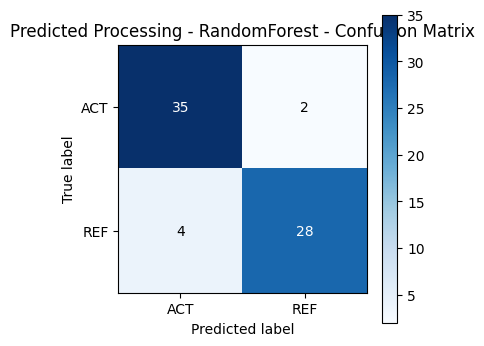

AUC Score: 0.9869087837837838


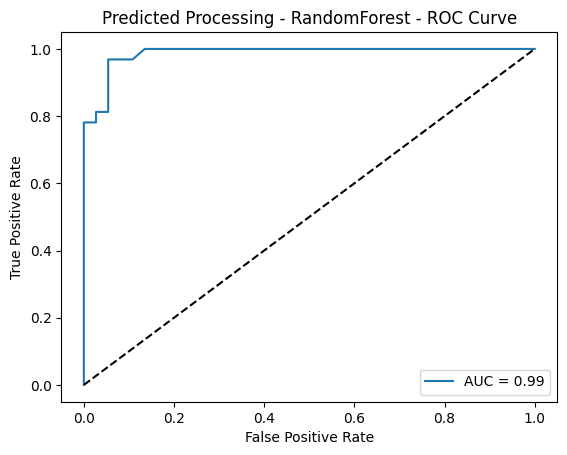


📌 Model: XGBoost
Accuracy: 0.9130434782608695
Precision: 0.9140839836492011
Recall: 0.9130434782608695
Specificity: 0.9459459459459459
F1 Score: 0.9127851184764155
Cohen Kappa: 0.8244274809160306
Log Loss: 0.17996501947238047
Train Time (s): 0.1631300449371338
Test Time (s): 0.0006680488586425781
Confusion Matrix:
 [[35  2]
 [ 4 28]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.95      0.92        37
           1       0.93      0.88      0.90        32

    accuracy                           0.91        69
   macro avg       0.92      0.91      0.91        69
weighted avg       0.91      0.91      0.91        69



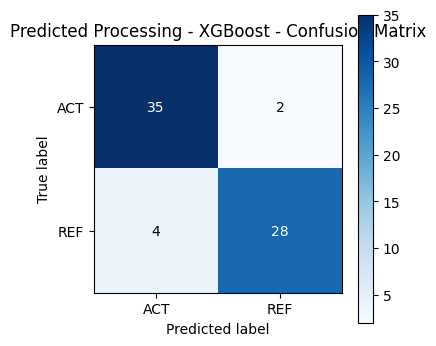

AUC Score: 0.9814189189189189


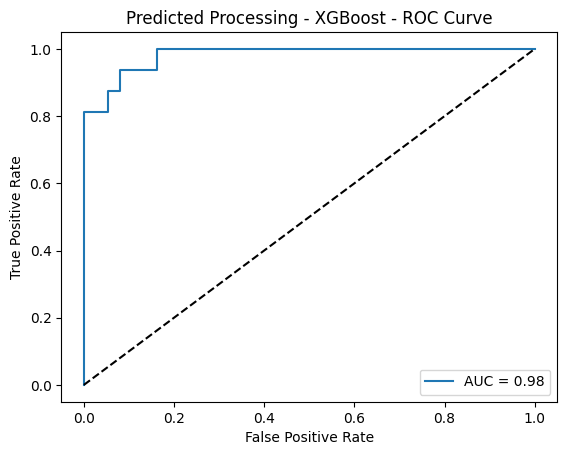


📌 Model: AdaBoost
Accuracy: 0.8985507246376812
Precision: 0.9009870064967516
Recall: 0.8985507246376812
Specificity: 0.9459459459459459
F1 Score: 0.8980323549104732
Cohen Kappa: 0.7947301317467064
Log Loss: 0.5470293263077914
Train Time (s): 0.09326696395874023
Test Time (s): 0.010372400283813477
Confusion Matrix:
 [[35  2]
 [ 5 27]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.95      0.91        37
           1       0.93      0.84      0.89        32

    accuracy                           0.90        69
   macro avg       0.90      0.89      0.90        69
weighted avg       0.90      0.90      0.90        69



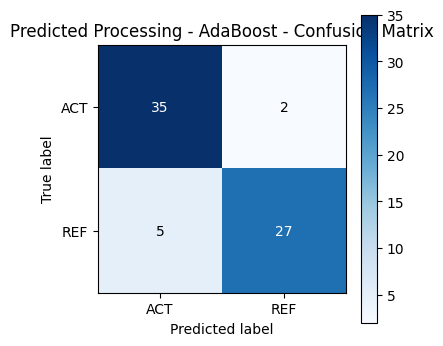

AUC Score: 0.9683277027027026


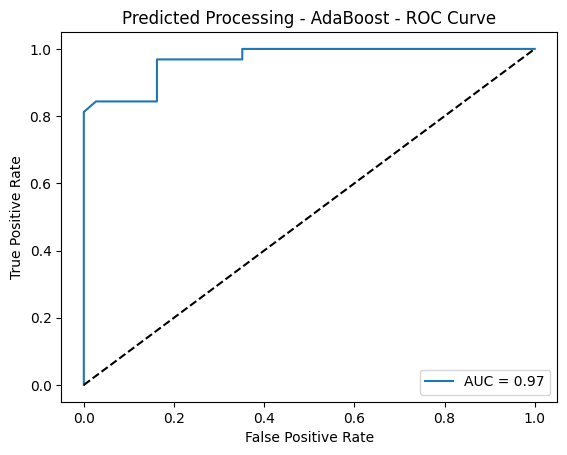


📌 Model: Bagging
Accuracy: 0.8985507246376812
Precision: 0.9062188482478337
Recall: 0.8985507246376812
Specificity: 0.972972972972973
F1 Score: 0.8974624466355109
Cohen Kappa: 0.793854033290653
Log Loss: 0.2070572830231071
Train Time (s): 0.029134511947631836
Test Time (s): 0.001739501953125
Confusion Matrix:
 [[36  1]
 [ 6 26]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.97      0.91        37
           1       0.96      0.81      0.88        32

    accuracy                           0.90        69
   macro avg       0.91      0.89      0.90        69
weighted avg       0.91      0.90      0.90        69



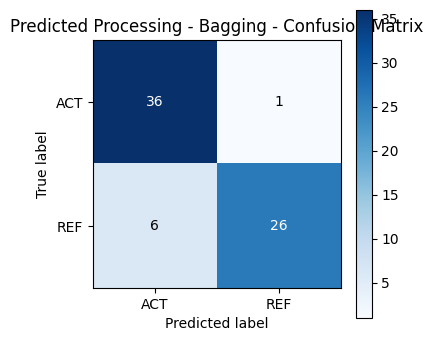

AUC Score: 0.9805743243243243


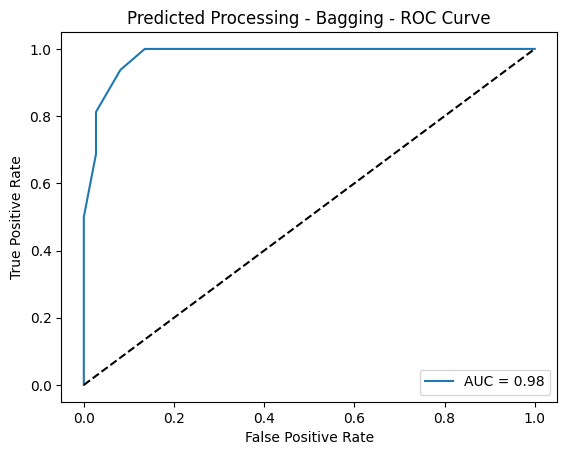


📌 Model: ExtraTrees
Accuracy: 0.927536231884058
Precision: 0.9277453802809971
Recall: 0.927536231884058
Specificity: 0.9459459459459459
F1 Score: 0.927444214400736
Cohen Kappa: 0.8539991536182818
Log Loss: 0.2822286977074213
Train Time (s): 0.11459612846374512
Test Time (s): 0.006350040435791016
Confusion Matrix:
 [[35  2]
 [ 3 29]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.95      0.93        37
           1       0.94      0.91      0.92        32

    accuracy                           0.93        69
   macro avg       0.93      0.93      0.93        69
weighted avg       0.93      0.93      0.93        69



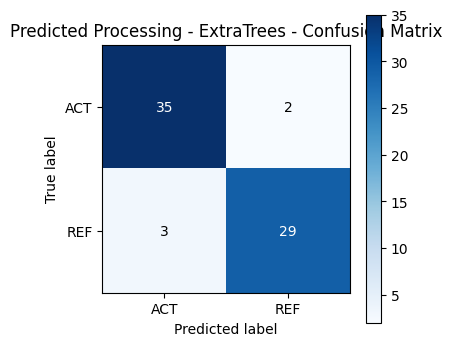

AUC Score: 0.9869087837837838


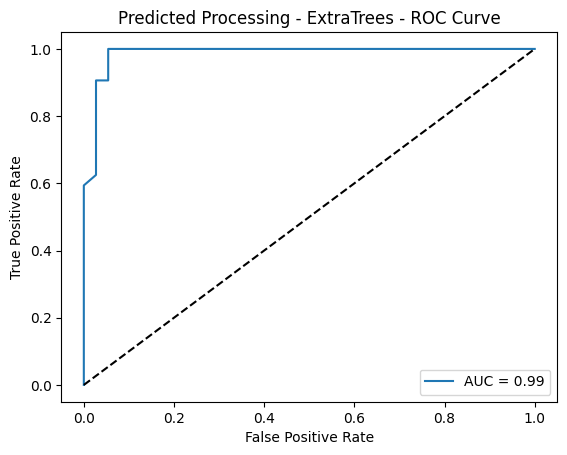


📌 Model: LogisticRegression
Accuracy: 0.5942028985507246
Precision: 0.5935020884142068
Recall: 0.5942028985507246
Specificity: 0.7567567567567568
F1 Score: 0.5807836822329575
Cohen Kappa: 0.16652286453839527
Log Loss: 0.6407540346258753
Train Time (s): 0.011574506759643555
Test Time (s): 0.00032639503479003906
Confusion Matrix:
 [[28  9]
 [19 13]]

Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.76      0.67        37
           1       0.59      0.41      0.48        32

    accuracy                           0.59        69
   macro avg       0.59      0.58      0.57        69
weighted avg       0.59      0.59      0.58        69



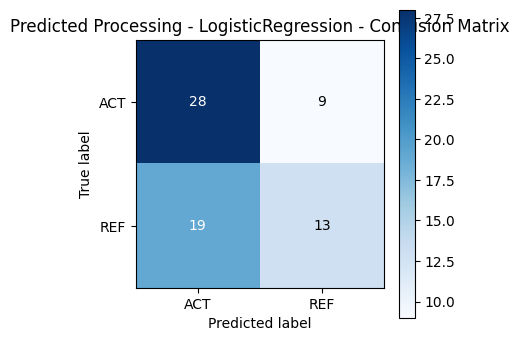

AUC Score: 0.6739864864864865


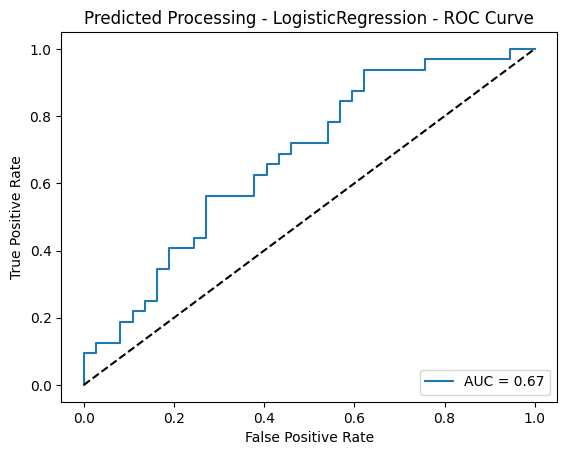


📌 Model: NaiveBayes
Accuracy: 0.7246376811594203
Precision: 0.7280720984045792
Recall: 0.7246376811594203
Specificity: 0.7027027027027027
F1 Score: 0.7249849954148424
Cohen Kappa: 0.4498531263113722
Log Loss: 0.5928116293928714
Train Time (s): 0.0014193058013916016
Test Time (s): 0.000308990478515625
Confusion Matrix:
 [[26 11]
 [ 8 24]]

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.70      0.73        37
           1       0.69      0.75      0.72        32

    accuracy                           0.72        69
   macro avg       0.73      0.73      0.72        69
weighted avg       0.73      0.72      0.72        69



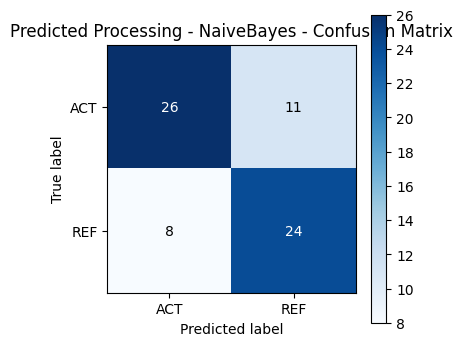

AUC Score: 0.777027027027027


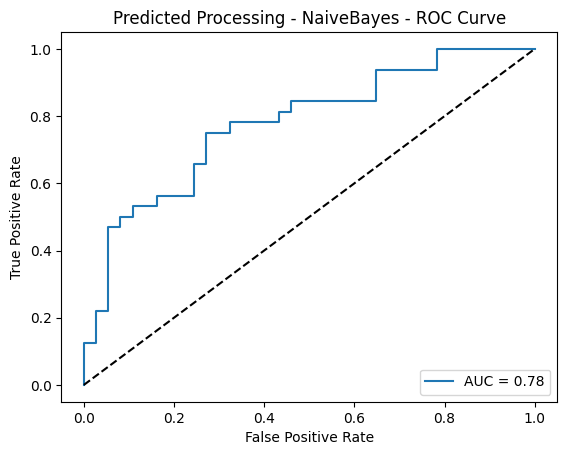


📌 Model: SVM
Accuracy: 0.7971014492753623
Precision: 0.7989526245280721
Recall: 0.7971014492753623
Specificity: 0.7837837837837838
F1 Score: 0.7973576343141561
Cohen Kappa: 0.5937762825904122
Log Loss: 0.44255460970925853
Train Time (s): 0.02299952507019043
Test Time (s): 0.0015056133270263672
Confusion Matrix:
 [[29  8]
 [ 6 26]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.78      0.81        37
           1       0.76      0.81      0.79        32

    accuracy                           0.80        69
   macro avg       0.80      0.80      0.80        69
weighted avg       0.80      0.80      0.80        69



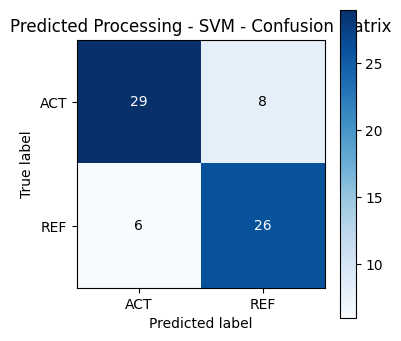

AUC Score: 0.8741554054054054


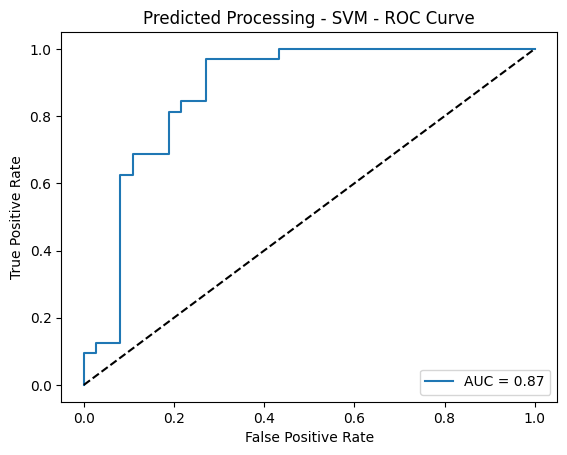


📌 Model: KNN
Accuracy: 0.782608695652174
Precision: 0.7833040550431855
Recall: 0.782608695652174
Specificity: 0.7837837837837838
F1 Score: 0.7827919549182205
Cohen Kappa: 0.5638432364096081
Log Loss: 0.41510442149458215
Train Time (s): 0.0012505054473876953
Test Time (s): 0.0025730133056640625
Confusion Matrix:
 [[29  8]
 [ 7 25]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.78      0.79        37
           1       0.76      0.78      0.77        32

    accuracy                           0.78        69
   macro avg       0.78      0.78      0.78        69
weighted avg       0.78      0.78      0.78        69



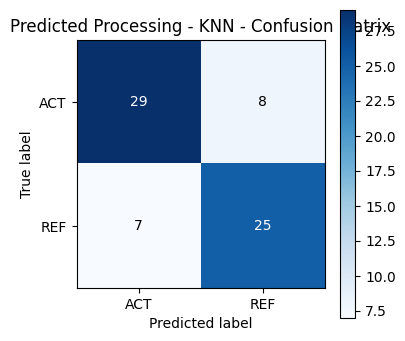

AUC Score: 0.8762668918918919


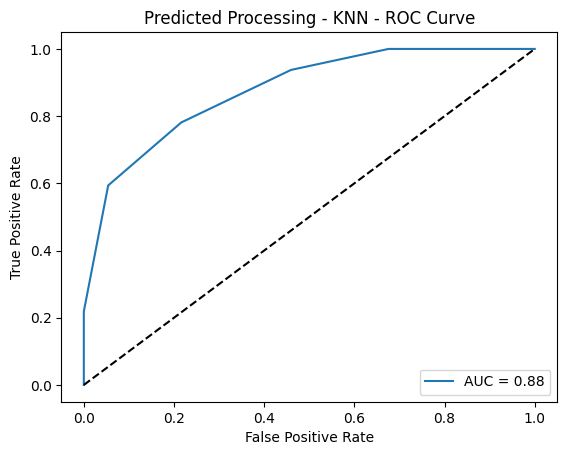


📌 Model: DecisionTree
Accuracy: 0.8695652173913043
Precision: 0.8731823164048229
Recall: 0.8695652173913043
Specificity: 0.8378378378378378
F1 Score: 0.8697297346701885
Cohen Kappa: 0.7394041124632815
Log Loss: 4.701346094232672
Train Time (s): 0.003423929214477539
Test Time (s): 0.0003237724304199219
Confusion Matrix:
 [[31  6]
 [ 3 29]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.84      0.87        37
           1       0.83      0.91      0.87        32

    accuracy                           0.87        69
   macro avg       0.87      0.87      0.87        69
weighted avg       0.87      0.87      0.87        69



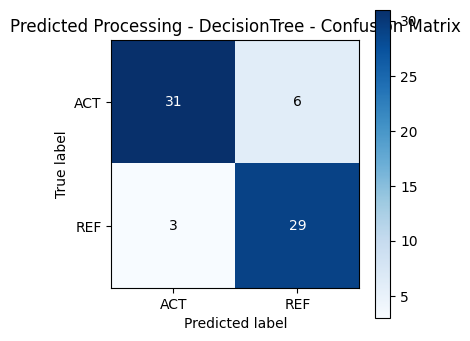

AUC Score: 0.8720439189189189


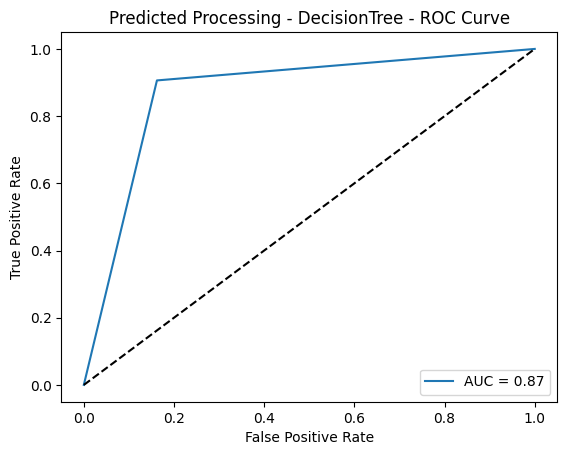


 FILE: Unlabelled_with_Predicted_LabelsPerception.csv | TARGET: Predicted Perception
✅ SMOTE Applied (k_neighbors=5) → Class Distribution: [249 249]

📌 Model: RandomForest
Accuracy: 0.95
Precision: 0.9548076923076922
Recall: 0.95
Specificity: 1.0
F1 Score: 0.9500250025002501
Cohen Kappa: 0.9002394253790902
Log Loss: 0.1872532991269806
Train Time (s): 0.21363472938537598
Test Time (s): 0.009999275207519531
Confusion Matrix:
 [[47  0]
 [ 5 48]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      1.00      0.95        47
           1       1.00      0.91      0.95        53

    accuracy                           0.95       100
   macro avg       0.95      0.95      0.95       100
weighted avg       0.95      0.95      0.95       100



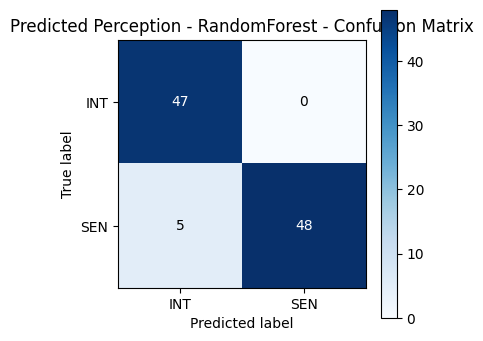

AUC Score: 0.9917703733440386


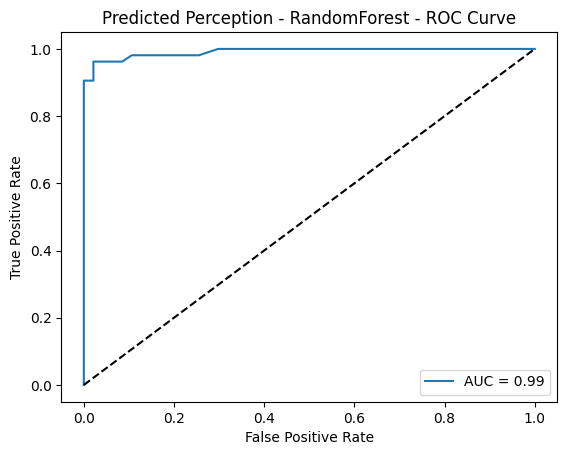


📌 Model: XGBoost
Accuracy: 0.94
Precision: 0.9431052420968388
Recall: 0.94
Specificity: 0.9787234042553191
F1 Score: 0.940048019207683
Cohen Kappa: 0.8801438274071115
Log Loss: 0.14449270530230154
Train Time (s): 0.2931499481201172
Test Time (s): 0.0009102821350097656
Confusion Matrix:
 [[46  1]
 [ 5 48]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.98      0.94        47
           1       0.98      0.91      0.94        53

    accuracy                           0.94       100
   macro avg       0.94      0.94      0.94       100
weighted avg       0.94      0.94      0.94       100



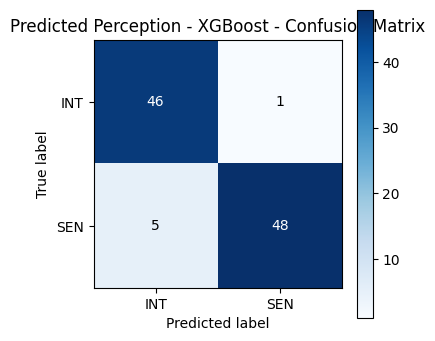

AUC Score: 0.993175431553593


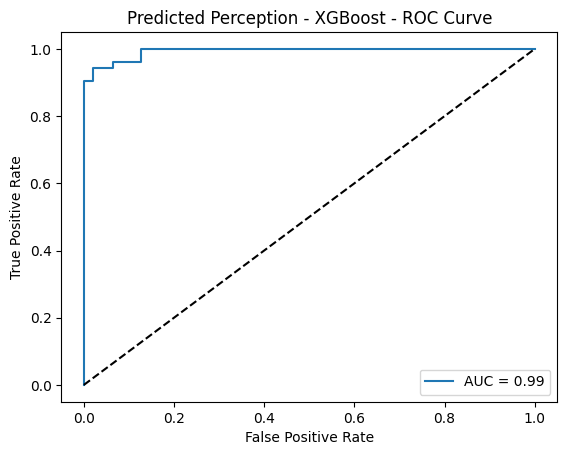


📌 Model: AdaBoost
Accuracy: 0.92
Precision: 0.9316363636363636
Recall: 0.92
Specificity: 1.0
F1 Score: 0.9198719487795118
Cohen Kappa: 0.8409542743538767
Log Loss: 0.542682094053363
Train Time (s): 0.10770535469055176
Test Time (s): 0.0080718994140625
Confusion Matrix:
 [[47  0]
 [ 8 45]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      1.00      0.92        47
           1       1.00      0.85      0.92        53

    accuracy                           0.92       100
   macro avg       0.93      0.92      0.92       100
weighted avg       0.93      0.92      0.92       100



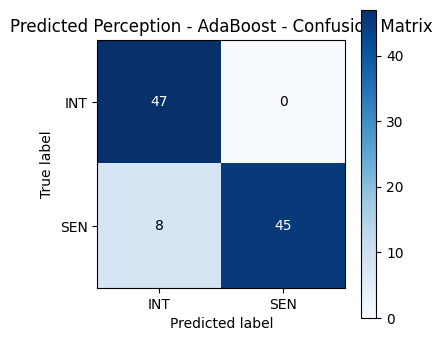

AUC Score: 0.9610598153352068


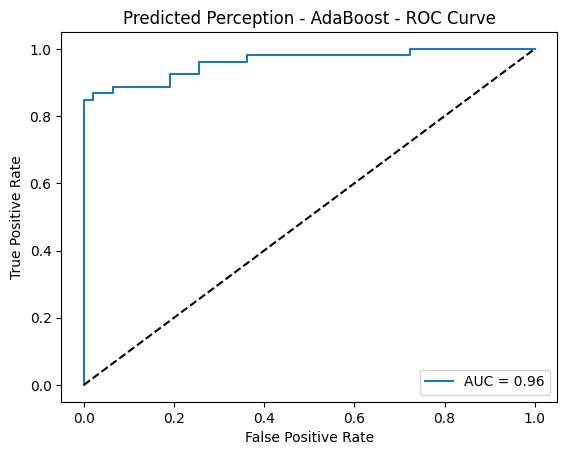


📌 Model: Bagging
Accuracy: 0.94
Precision: 0.9467924528301888
Recall: 0.94
Specificity: 1.0
F1 Score: 0.94
Cohen Kappa: 0.8804304503786369
Log Loss: 0.4954366144089233
Train Time (s): 0.04126572608947754
Test Time (s): 0.0017604827880859375
Confusion Matrix:
 [[47  0]
 [ 6 47]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94        47
           1       1.00      0.89      0.94        53

    accuracy                           0.94       100
   macro avg       0.94      0.94      0.94       100
weighted avg       0.95      0.94      0.94       100



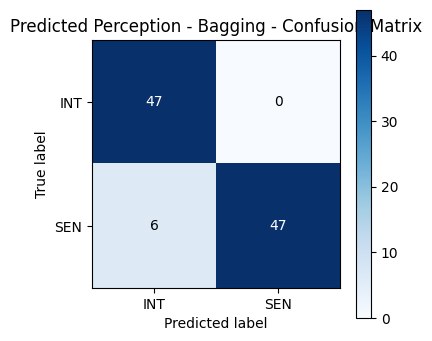

AUC Score: 0.9795262946607788


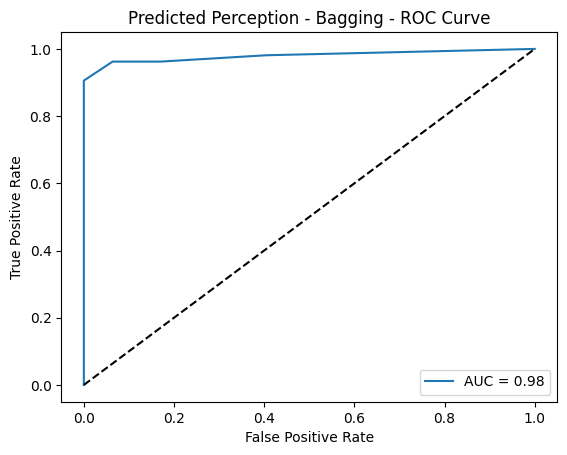


📌 Model: ExtraTrees
Accuracy: 0.94
Precision: 0.9467924528301888
Recall: 0.94
Specificity: 1.0
F1 Score: 0.94
Cohen Kappa: 0.8804304503786369
Log Loss: 0.18543849164176127
Train Time (s): 0.12263655662536621
Test Time (s): 0.007219076156616211
Confusion Matrix:
 [[47  0]
 [ 6 47]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94        47
           1       1.00      0.89      0.94        53

    accuracy                           0.94       100
   macro avg       0.94      0.94      0.94       100
weighted avg       0.95      0.94      0.94       100



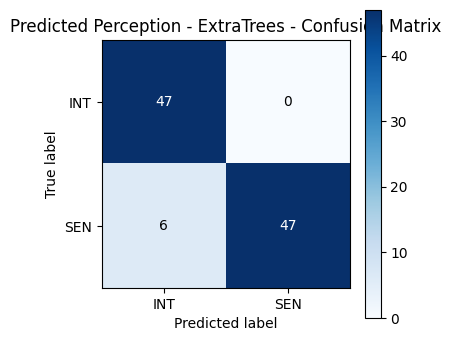

AUC Score: 0.9957848253713368


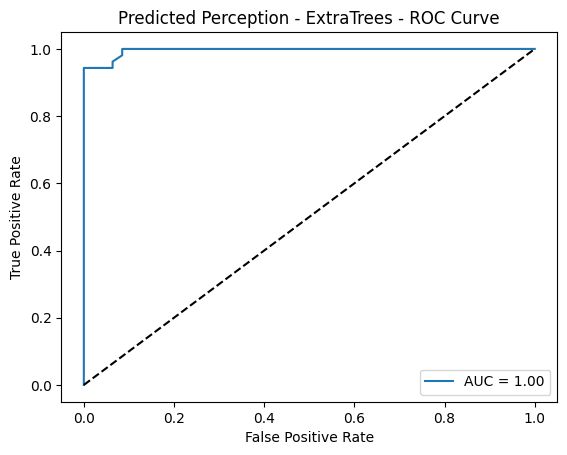


📌 Model: LogisticRegression
Accuracy: 0.82
Precision: 0.8259253311922923
Recall: 0.82
Specificity: 0.8723404255319149
F1 Score: 0.82
Cohen Kappa: 0.6412913511359107
Log Loss: 0.466733728694135
Train Time (s): 0.03497958183288574
Test Time (s): 0.0003197193145751953
Confusion Matrix:
 [[41  6]
 [12 41]]

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.87      0.82        47
           1       0.87      0.77      0.82        53

    accuracy                           0.82       100
   macro avg       0.82      0.82      0.82       100
weighted avg       0.83      0.82      0.82       100



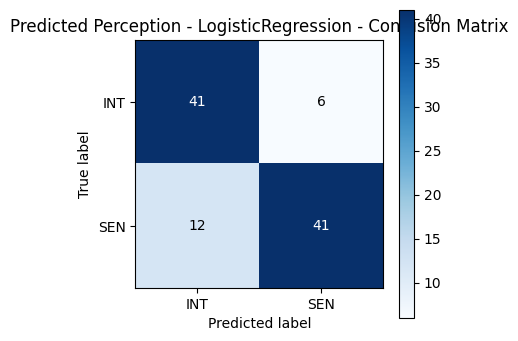

AUC Score: 0.8795664391810518


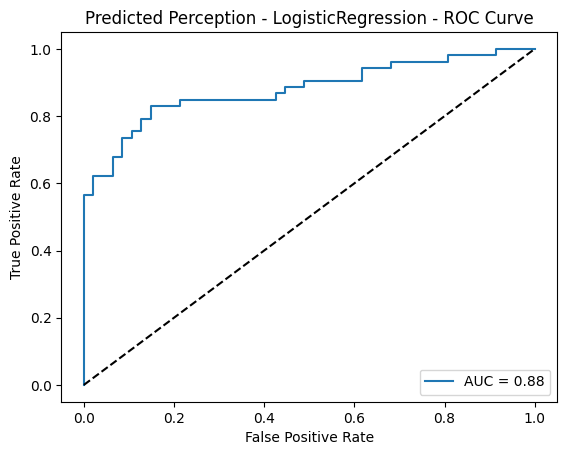


📌 Model: NaiveBayes
Accuracy: 0.84
Precision: 0.8429451780712285
Recall: 0.84
Specificity: 0.8723404255319149
F1 Score: 0.8401280512204883
Cohen Kappa: 0.6803835397522973
Log Loss: 0.4525506613693605
Train Time (s): 0.0014576911926269531
Test Time (s): 0.0003437995910644531
Confusion Matrix:
 [[41  6]
 [10 43]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.87      0.84        47
           1       0.88      0.81      0.84        53

    accuracy                           0.84       100
   macro avg       0.84      0.84      0.84       100
weighted avg       0.84      0.84      0.84       100



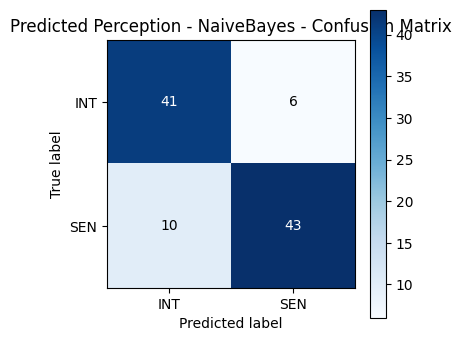

AUC Score: 0.8960256924929747


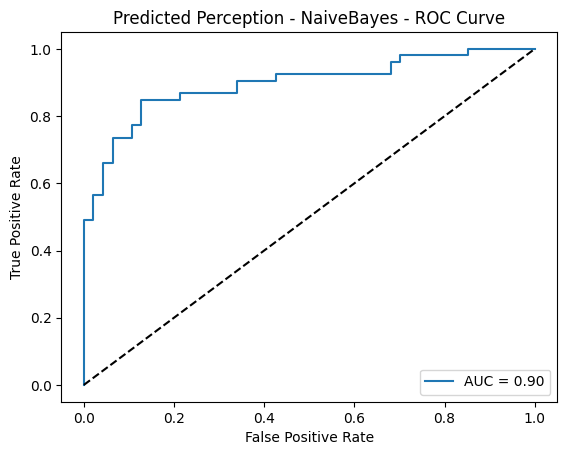


📌 Model: SVM
Accuracy: 0.87
Precision: 0.8835876623376623
Recall: 0.87
Specificity: 0.9574468085106383
F1 Score: 0.8696486838154339
Cohen Kappa: 0.7418586179507546
Log Loss: 0.2644258501969548
Train Time (s): 0.03061509132385254
Test Time (s): 0.0012896060943603516
Confusion Matrix:
 [[45  2]
 [11 42]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.96      0.87        47
           1       0.95      0.79      0.87        53

    accuracy                           0.87       100
   macro avg       0.88      0.87      0.87       100
weighted avg       0.88      0.87      0.87       100



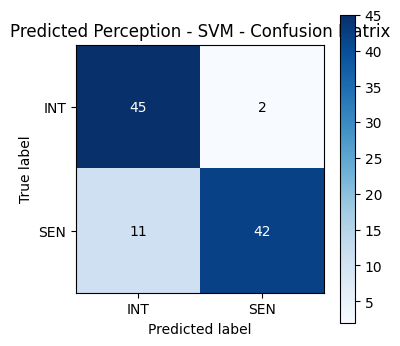

AUC Score: 0.9574468085106382


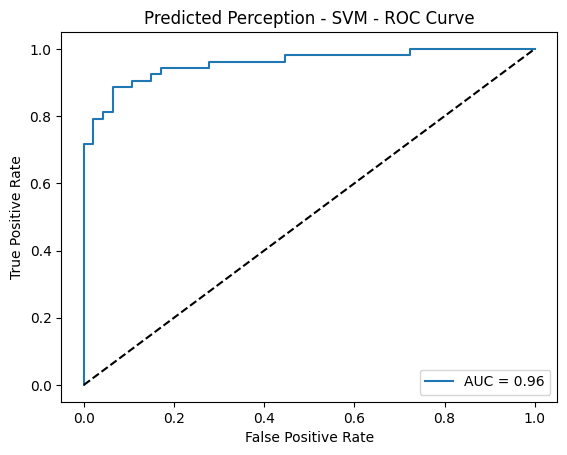


📌 Model: KNN
Accuracy: 0.85
Precision: 0.8770833333333334
Recall: 0.85
Specificity: 0.9787234042553191
F1 Score: 0.8486282785649684
Cohen Kappa: 0.7035573122529644
Log Loss: 1.2875743178701864
Train Time (s): 0.0013878345489501953
Test Time (s): 0.003274679183959961
Confusion Matrix:
 [[46  1]
 [14 39]]

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.98      0.86        47
           1       0.97      0.74      0.84        53

    accuracy                           0.85       100
   macro avg       0.87      0.86      0.85       100
weighted avg       0.88      0.85      0.85       100



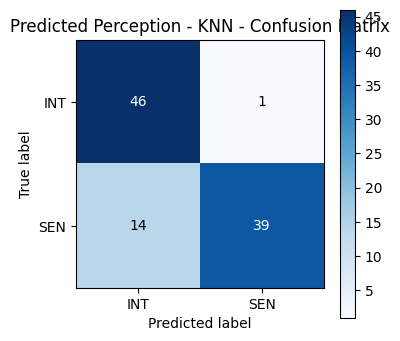

AUC Score: 0.9468085106382977


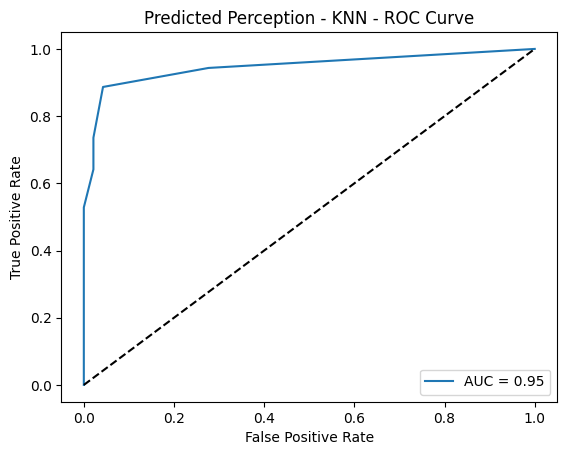


📌 Model: DecisionTree
Accuracy: 0.96
Precision: 0.9608323329331734
Recall: 0.96
Specificity: 0.9787234042553191
F1 Score: 0.9600320512820514
Cohen Kappa: 0.9199038846615939
Log Loss: 1.4417461355646861
Train Time (s): 0.0049839019775390625
Test Time (s): 0.00030541419982910156
Confusion Matrix:
 [[46  1]
 [ 3 50]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96        47
           1       0.98      0.94      0.96        53

    accuracy                           0.96       100
   macro avg       0.96      0.96      0.96       100
weighted avg       0.96      0.96      0.96       100



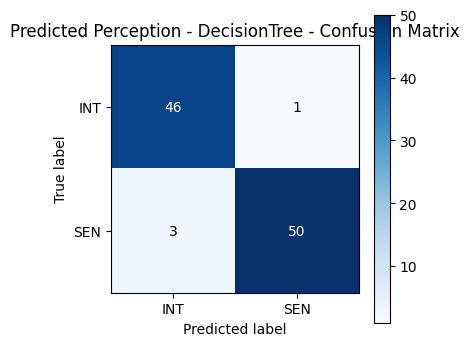

AUC Score: 0.9610598153352067


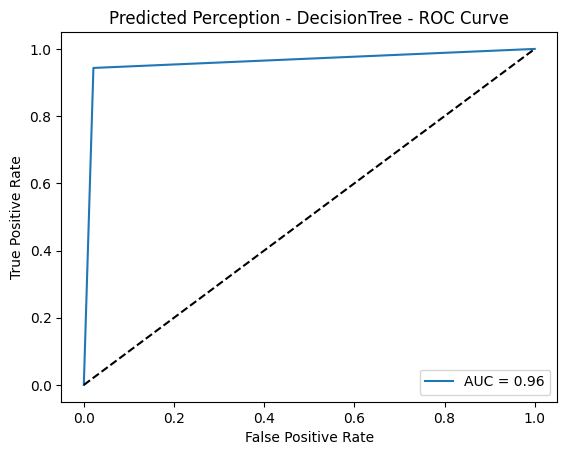


 FILE: Unlabelled_with_Predicted_LabelsInput.csv | TARGET: Predicted Input
✅ SMOTE Applied (k_neighbors=2) → Class Distribution: [312 312]

📌 Model: RandomForest
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
Specificity: 1.0
F1 Score: 1.0
Cohen Kappa: 1.0
Log Loss: 0.0037882100052774514
Train Time (s): 0.25837278366088867
Test Time (s): 0.011597871780395508
Confusion Matrix:
 [[71  0]
 [ 0 54]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        71
           1       1.00      1.00      1.00        54

    accuracy                           1.00       125
   macro avg       1.00      1.00      1.00       125
weighted avg       1.00      1.00      1.00       125



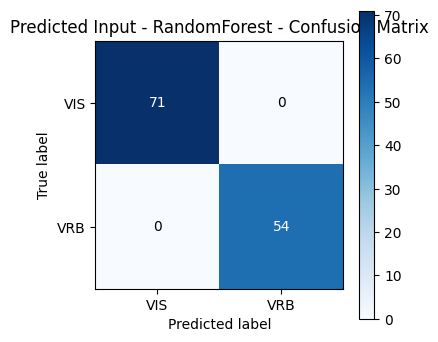

AUC Score: 1.0


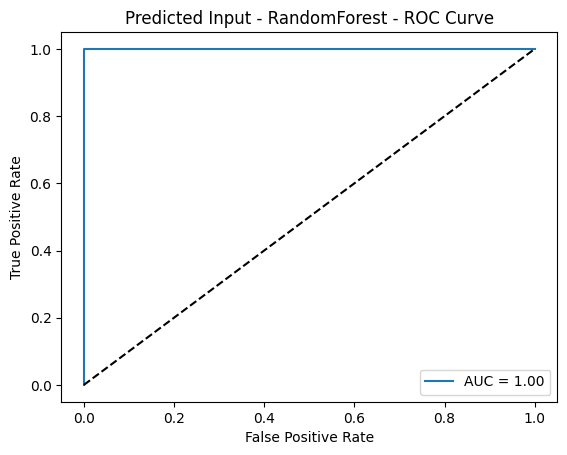


📌 Model: XGBoost
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
Specificity: 1.0
F1 Score: 1.0
Cohen Kappa: 1.0
Log Loss: 2.1996066004390797e-05
Train Time (s): 0.2041003704071045
Test Time (s): 0.0028810501098632812
Confusion Matrix:
 [[71  0]
 [ 0 54]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        71
           1       1.00      1.00      1.00        54

    accuracy                           1.00       125
   macro avg       1.00      1.00      1.00       125
weighted avg       1.00      1.00      1.00       125



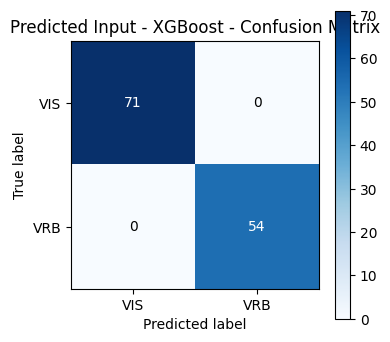

AUC Score: 1.0


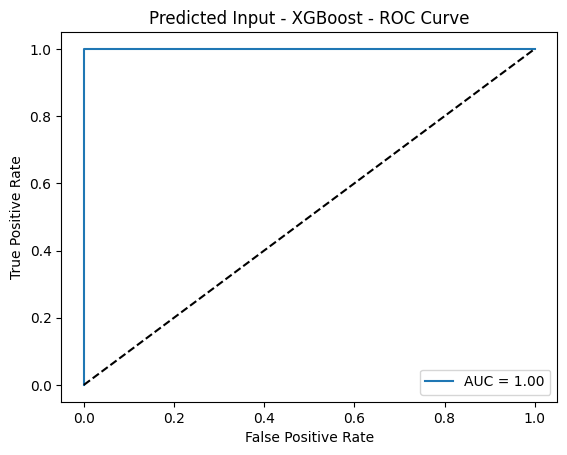


📌 Model: AdaBoost
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
Specificity: 1.0
F1 Score: 1.0
Cohen Kappa: 1.0
Log Loss: 0.12692801104297266
Train Time (s): 0.006014347076416016
Test Time (s): 0.0006625652313232422
Confusion Matrix:
 [[71  0]
 [ 0 54]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        71
           1       1.00      1.00      1.00        54

    accuracy                           1.00       125
   macro avg       1.00      1.00      1.00       125
weighted avg       1.00      1.00      1.00       125



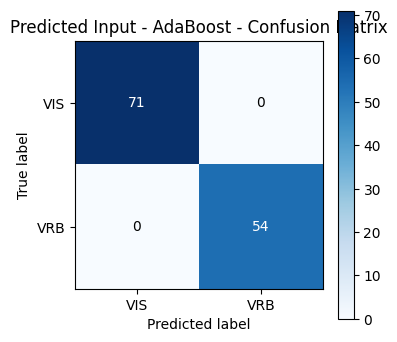

AUC Score: 1.0


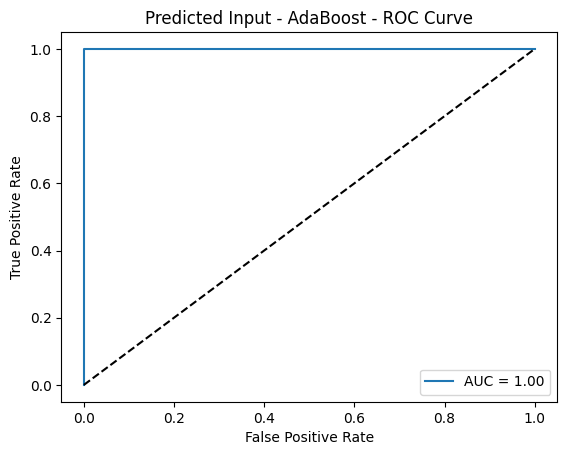


📌 Model: Bagging
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
Specificity: 1.0
F1 Score: 1.0
Cohen Kappa: 1.0
Log Loss: 0.0008428841252628305
Train Time (s): 0.034879207611083984
Test Time (s): 0.0029833316802978516
Confusion Matrix:
 [[71  0]
 [ 0 54]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        71
           1       1.00      1.00      1.00        54

    accuracy                           1.00       125
   macro avg       1.00      1.00      1.00       125
weighted avg       1.00      1.00      1.00       125



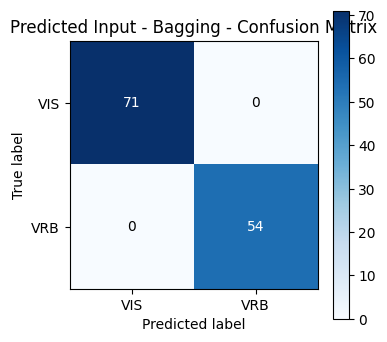

AUC Score: 1.0


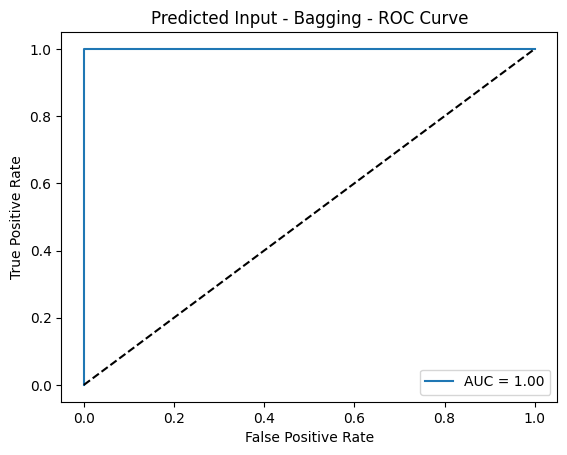


📌 Model: ExtraTrees
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
Specificity: 1.0
F1 Score: 1.0
Cohen Kappa: 1.0
Log Loss: 0.0032281705339057432
Train Time (s): 0.3621702194213867
Test Time (s): 0.05991244316101074
Confusion Matrix:
 [[71  0]
 [ 0 54]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        71
           1       1.00      1.00      1.00        54

    accuracy                           1.00       125
   macro avg       1.00      1.00      1.00       125
weighted avg       1.00      1.00      1.00       125



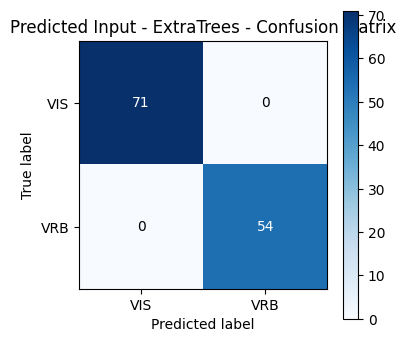

AUC Score: 1.0


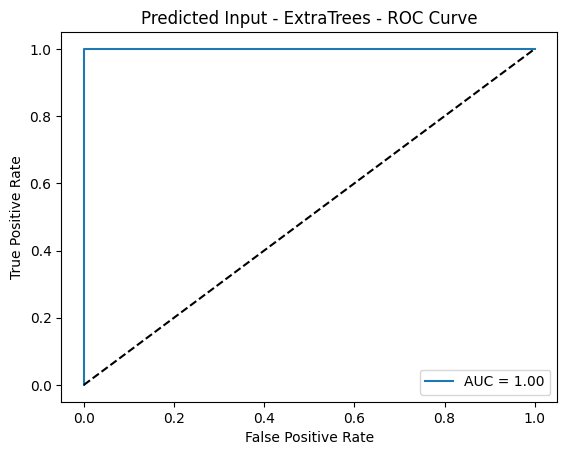


📌 Model: LogisticRegression
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
Specificity: 1.0
F1 Score: 1.0
Cohen Kappa: 1.0
Log Loss: 0.003202128420785673
Train Time (s): 0.047289133071899414
Test Time (s): 0.0003077983856201172
Confusion Matrix:
 [[71  0]
 [ 0 54]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        71
           1       1.00      1.00      1.00        54

    accuracy                           1.00       125
   macro avg       1.00      1.00      1.00       125
weighted avg       1.00      1.00      1.00       125



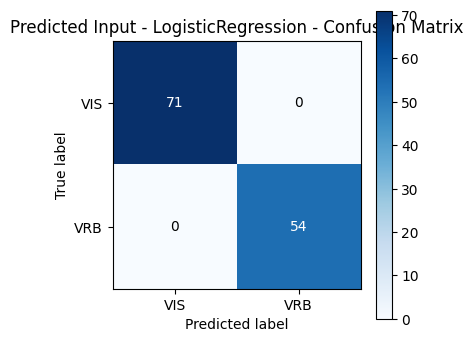

AUC Score: 1.0


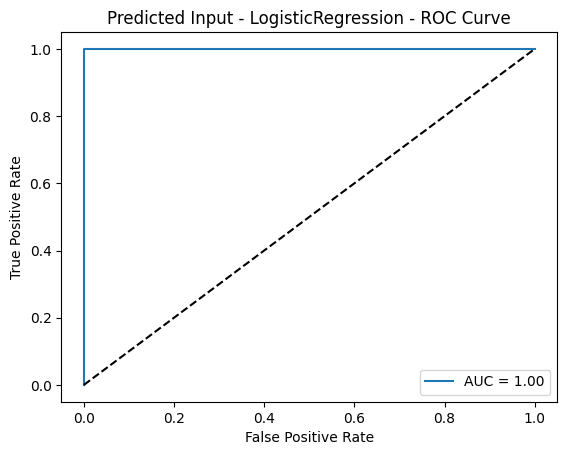


📌 Model: NaiveBayes
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
Specificity: 1.0
F1 Score: 1.0
Cohen Kappa: 1.0
Log Loss: 1.8598456108521063e-15
Train Time (s): 0.0017888545989990234
Test Time (s): 0.0004012584686279297
Confusion Matrix:
 [[71  0]
 [ 0 54]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        71
           1       1.00      1.00      1.00        54

    accuracy                           1.00       125
   macro avg       1.00      1.00      1.00       125
weighted avg       1.00      1.00      1.00       125



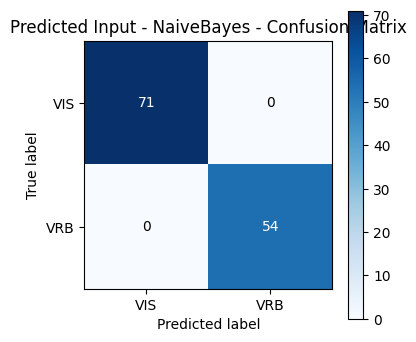

AUC Score: 1.0


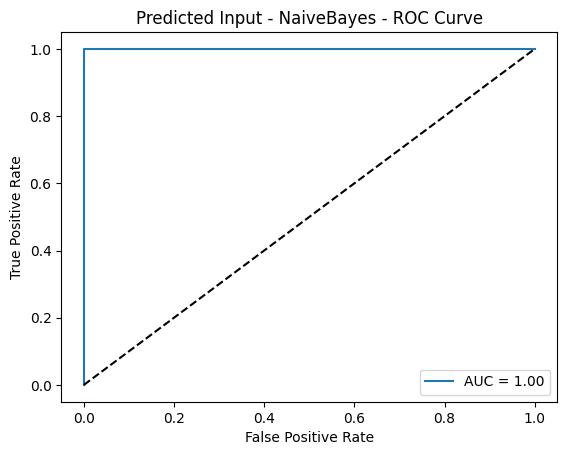


📌 Model: SVM
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
Specificity: 1.0
F1 Score: 1.0
Cohen Kappa: 1.0
Log Loss: 0.003940981580910675
Train Time (s): 0.027889251708984375
Test Time (s): 0.0008153915405273438
Confusion Matrix:
 [[71  0]
 [ 0 54]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        71
           1       1.00      1.00      1.00        54

    accuracy                           1.00       125
   macro avg       1.00      1.00      1.00       125
weighted avg       1.00      1.00      1.00       125



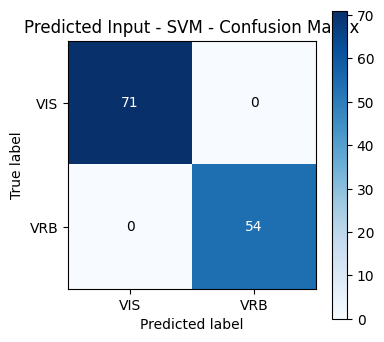

AUC Score: 1.0


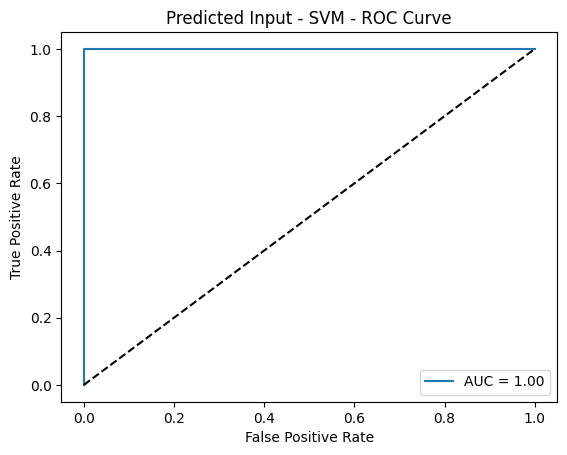


📌 Model: KNN
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
Specificity: 1.0
F1 Score: 1.0
Cohen Kappa: 1.0
Log Loss: 2.2204460492503136e-16
Train Time (s): 0.0019452571868896484
Test Time (s): 0.004062652587890625
Confusion Matrix:
 [[71  0]
 [ 0 54]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        71
           1       1.00      1.00      1.00        54

    accuracy                           1.00       125
   macro avg       1.00      1.00      1.00       125
weighted avg       1.00      1.00      1.00       125



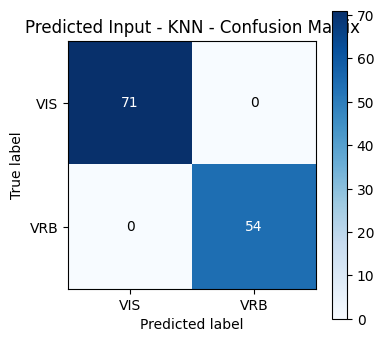

AUC Score: 1.0


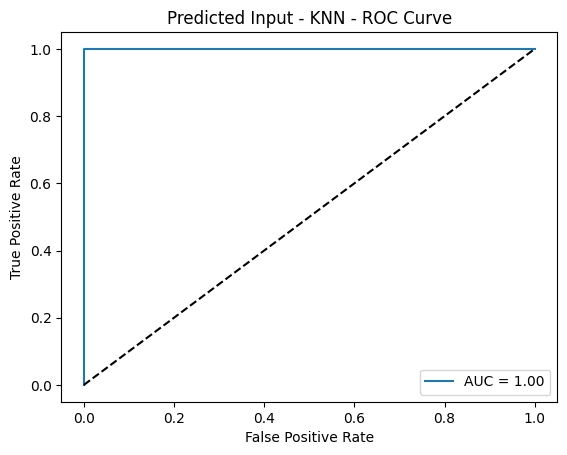


📌 Model: DecisionTree
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
Specificity: 1.0
F1 Score: 1.0
Cohen Kappa: 1.0
Log Loss: 2.2204460492503136e-16
Train Time (s): 0.0022916793823242188
Test Time (s): 0.0003693103790283203
Confusion Matrix:
 [[71  0]
 [ 0 54]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        71
           1       1.00      1.00      1.00        54

    accuracy                           1.00       125
   macro avg       1.00      1.00      1.00       125
weighted avg       1.00      1.00      1.00       125



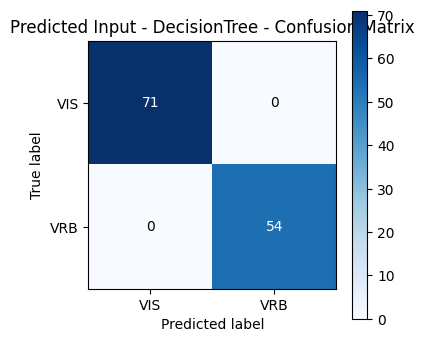

AUC Score: 1.0


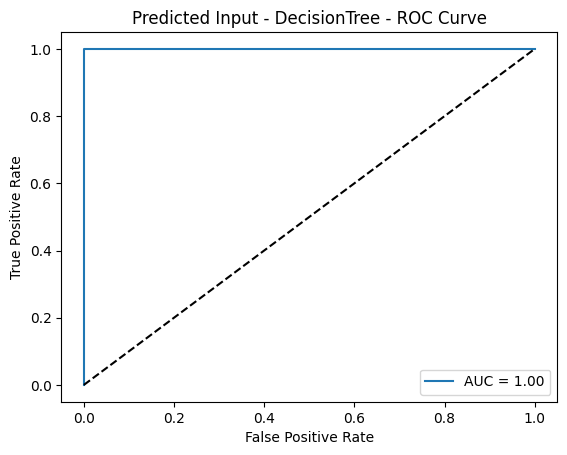

In [16]:
# ✅ Install libraries
!pip install imbalanced-learn
!pip install scikit-learn matplotlib

# ✅ Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from collections import Counter
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, precision_score, recall_score, roc_auc_score, roc_curve, classification_report, cohen_kappa_score, log_loss
from imblearn.over_sampling import SMOTE

# ✅ Define Files and Targets
files_targets = {
    "Unlabelled_with_Predicted_LabelsProcessing.csv": "Predicted Processing",
    "Unlabelled_with_Predicted_LabelsPerception.csv": "Predicted Perception",
    "Unlabelled_with_Predicted_LabelsInput.csv": "Predicted Input"
}

input_cols = ["Course overview", "Reading file", "Abstract materiale", "Concrete material",
              "Visual Materials", "Self-assessment", "Exercises submit", "Quiz submitted",
              "playing", "paused", "unstarted", "buffering"]

# ✅ Loop through each target
for file, target_column in files_targets.items():
    print("\n=============================")
    print(" FILE:", file, "| TARGET:", target_column)
    print("=============================")

    # Load dataset
    df = pd.read_csv("/content/" + file)

    # Prepare X and y
    X = df[input_cols]
    y = df[target_column]

    # Encode target
    le = LabelEncoder()
    y_encoded = le.fit_transform(y)

    # Scale input
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # ✅ Auto adjust SMOTE k_neighbors
    counter = Counter(y_encoded)
    min_samples = min(counter.values())

    if min_samples < 2:
        print("❗ Too few samples for SMOTE. Skipping balancing.")
        X_balanced, y_balanced = X_scaled, y_encoded
    else:
        k_neighbors = min(5, min_samples - 1)
        smote = SMOTE(random_state=42, k_neighbors=k_neighbors)
        X_balanced, y_balanced = smote.fit_resample(X_scaled, y_encoded)
        print(f"✅ SMOTE Applied (k_neighbors={k_neighbors}) → Class Distribution:", np.bincount(y_balanced))

    # Split train-test
    X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

    # Define models
    models = {
        "RandomForest": RandomForestClassifier(),
        "XGBoost": GradientBoostingClassifier(),
        "AdaBoost": AdaBoostClassifier(),
        "Bagging": BaggingClassifier(),
        "ExtraTrees": ExtraTreesClassifier(),
        "LogisticRegression": LogisticRegression(max_iter=1000),
        "NaiveBayes": GaussianNB(),
        "SVM": SVC(probability=True),
        "KNN": KNeighborsClassifier(),
        "DecisionTree": DecisionTreeClassifier()
    }

    # Train and evaluate
    for name, model in models.items():
        start_train = time.time()
        model.fit(X_train, y_train)
        train_time = time.time() - start_train

        start_test = time.time()
        y_pred = model.predict(X_test)
        test_time = time.time() - start_test

        y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

        acc = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average="weighted")
        precision = precision_score(y_test, y_pred, average="weighted")
        recall = recall_score(y_test, y_pred, average="weighted")
        cm = confusion_matrix(y_test, y_pred)
        specificity = cm[0][0] / (cm[0][0] + cm[0][1]) if (cm.shape[0] > 1 and (cm[0][0] + cm[0][1]) != 0) else 0
        kappa = cohen_kappa_score(y_test, y_pred)
        logloss = log_loss(y_test, model.predict_proba(X_test)) if hasattr(model, "predict_proba") else "N/A"

        # Print Results
        print("\n📌 Model:", name)
        print("Accuracy:", acc)
        print("Precision:", precision)
        print("Recall:", recall)
        print("Specificity:", specificity)
        print("F1 Score:", f1)
        print("Cohen Kappa:", kappa)
        print("Log Loss:", logloss)
        print("Train Time (s):", train_time)
        print("Test Time (s):", test_time)
        print("Confusion Matrix:\n", cm)

        print("\nClassification Report:\n", classification_report(y_test, y_pred))

        # Plot Confusion Matrix
        plt.figure(figsize=(4, 4))
        plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
        plt.title(f"{target_column} - {name} - Confusion Matrix")
        plt.colorbar()
        plt.xticks(np.arange(len(le.classes_)), le.classes_)
        plt.yticks(np.arange(len(le.classes_)), le.classes_)
        plt.xlabel('Predicted label')
        plt.ylabel('True label')

        thresh = cm.max() / 2
        for i in range(cm.shape[0]):
            for j in range(cm.shape[1]):
                plt.text(j, i, format(cm[i, j], 'd'),
                         ha="center", va="center",
                         color="white" if cm[i, j] > thresh else "black")

        plt.show()

        # Plot ROC Curve if binary classification
        if y_proba is not None and len(np.unique(y_test)) == 2:
            auc = roc_auc_score(y_test, y_proba)
            fpr, tpr, _ = roc_curve(y_test, y_proba)
            print("AUC Score:", auc)

            plt.figure()
            plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
            plt.plot([0, 1], [0, 1], 'k--')
            plt.title(f"{target_column} - {name} - ROC Curve")
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.legend(loc='lower right')
            plt.show()


In [17]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif
from sklearn.impute import SimpleImputer

# Load the balanced Processing dataset
file_path = "Unlabelled_with_Predicted_LabelsProcessing.csv"
df = pd.read_csv(file_path)

# Clean columns
df.columns = df.columns.str.strip()

# Define input columns
input_cols = ["Course overview", "Reading file", "Abstract materiale", "Concrete material",
              "Visual Materials", "Self-assessment", "Exercises submit", "Quiz submitted",
              "playing", "paused", "unstarted", "buffering"]

# Select X and y
X = df[input_cols]
y = df["Predicted Processing"]

# Encode y
le = LabelEncoder()
y_encoded = le.fit_transform(y)  #  0= ACT,  1=REF

# Impute missing
imputer = SimpleImputer(strategy='mean')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# ==== CHI-SQUARE ====
chi_selector = SelectKBest(score_func=chi2, k='all')
chi_selector.fit(X_imputed, y_encoded)

chi_df = pd.DataFrame({
    'Feature': X_imputed.columns,
    'Chi2 Score': chi_selector.scores_,
    'p-value': chi_selector.pvalues_
}).sort_values(by='Chi2 Score', ascending=False)

print("\n=== Chi2 Feature Importance ===")
print(chi_df)

# ==== MUTUAL INFORMATION ====
mi_scores = mutual_info_classif(X_imputed, y_encoded)

mi_df = pd.DataFrame({
    'Feature': X_imputed.columns,
    'MI Score': mi_scores
}).sort_values(by='MI Score', ascending=False)

print("\n=== Mutual Information Feature Importance ===")
print(mi_df)

# ==== 0 vs 1 mean compare ====
X_act = X_imputed[y_encoded == 0]
X_ref = X_imputed[y_encoded == 1]

feature_direction = []
for feature in X_imputed.columns:
    if X_act[feature].mean() > X_ref[feature].mean():
        feature_direction.append("ACT")
    else:
        feature_direction.append("REF")

direction_df = pd.DataFrame({
    "Feature": X_imputed.columns,
    "Higher In": feature_direction
})

print("\n=== Feature Higher in ACT or REF ===")
print(direction_df)

# Final Combine Report
final_df = chi_df.merge(mi_df, on="Feature").merge(direction_df, on="Feature")
print("\n FINAL FEATURE ENGINEERING REPORT:")
print(final_df)

# Optional → Save to Excel
final_df.to_excel("Processing_Feature_Engineering_Report.xlsx", index=False)
print("\nSaved Final Report → Processing_Feature_Engineering_Report.xlsx")


# Create lists to hold features for ACT and REF
act_features = direction_df[direction_df["Higher In"] == "ACT"]["Feature"].tolist()
ref_features = direction_df[direction_df["Higher In"] == "REF"]["Feature"].tolist()

# Print them nicely
print("\n Features more associated with ACT:")
print(act_features)

print("\n Features more associated with REF:")
print(ref_features)




=== Chi2 Feature Importance ===
               Feature  Chi2 Score       p-value
9               paused  294.371038  5.548440e-66
4     Visual Materials  243.520159  6.717017e-55
8              playing  140.229034  2.372082e-32
11           buffering  112.668828  2.550001e-26
2   Abstract materiale   81.389039  1.853833e-19
0      Course overview   45.107412  1.865181e-11
1         Reading file   40.853096  1.641131e-10
10           unstarted   31.066192  2.493772e-08
5      Self-assessment    5.818377  1.585958e-02
3    Concrete material    0.728435  3.933908e-01
7       Quiz submitted    0.240634  6.237487e-01
6     Exercises submit    0.178870  6.723459e-01

=== Mutual Information Feature Importance ===
               Feature  MI Score
10           unstarted  0.148167
11           buffering  0.123219
8              playing  0.106463
6     Exercises submit  0.084097
9               paused  0.072472
1         Reading file  0.070756
0      Course overview  0.066710
3    Concrete mater

In [18]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif
from sklearn.impute import SimpleImputer

# Load the balanced Input dataset
file_path = "Unlabelled_with_Predicted_LabelsInput.csv"
df = pd.read_csv(file_path)

# Clean columns
df.columns = df.columns.str.strip()

# Define input columns
input_cols = ["Course overview", "Reading file", "Abstract materiale", "Concrete material",
              "Visual Materials", "Self-assessment", "Exercises submit", "Quiz submitted",
              "playing", "paused", "unstarted", "buffering"]

# Select X and y
X = df[input_cols]
y = df["Predicted Input"]

# Encode y
le = LabelEncoder()
y_encoded = le.fit_transform(y)  # 0 =VIS, 1=VRB

# Impute missing
imputer = SimpleImputer(strategy='mean')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# ==== CHI-SQUARE ====
chi_selector = SelectKBest(score_func=chi2, k='all')
chi_selector.fit(X_imputed, y_encoded)

chi_df = pd.DataFrame({
    'Feature': X_imputed.columns,
    'Chi2 Score': chi_selector.scores_,
    'p-value': chi_selector.pvalues_
}).sort_values(by='Chi2 Score', ascending=False)

print("\n=== Chi2 Feature Importance ===")
print(chi_df)

# ==== MUTUAL INFORMATION ====
mi_scores = mutual_info_classif(X_imputed, y_encoded)

mi_df = pd.DataFrame({
    'Feature': X_imputed.columns,
    'MI Score': mi_scores
}).sort_values(by='MI Score', ascending=False)

print("\n=== Mutual Information Feature Importance ===")
print(mi_df)

# ==== 0 vs 1 mean compare ====
X_act = X_imputed[y_encoded == 0]
X_ref = X_imputed[y_encoded == 1]

feature_direction = []
for feature in X_imputed.columns:
    if X_act[feature].mean() > X_ref[feature].mean():
        feature_direction.append("VIS")
    else:
        feature_direction.append("VRB")

direction_df = pd.DataFrame({
    "Feature": X_imputed.columns,
    "Higher In": feature_direction
})

print("\n=== Feature Higher in VIS or VRB ===")
print(direction_df)

# Final Combine Report
final_df = chi_df.merge(mi_df, on="Feature").merge(direction_df, on="Feature")
print("\n FINAL FEATURE ENGINEERING REPORT:")
print(final_df)
# Create lists to hold features for VIS and VRB
act_features = direction_df[direction_df["Higher In"] == "VIS"]["Feature"].tolist()
ref_features = direction_df[direction_df["Higher In"] == "VRB"]["Feature"].tolist()

# Print them nicely
print("\n Features more associated with VIS:")
print(act_features)

print("\n Features more associated with VRB:")
print(ref_features)

# Optional → Save to Excel
final_df.to_excel("Input_Feature_Engineering_Report.xlsx", index=False)
print("\nSaved Final Report → Input_Feature_Engineering_Report.xlsx")


=== Chi2 Feature Importance ===
               Feature   Chi2 Score        p-value
1         Reading file  2743.876221   0.000000e+00
3    Concrete material  1913.519163   0.000000e+00
2   Abstract materiale  1352.144803  5.267377e-296
5      Self-assessment   499.880870  1.008998e-110
4     Visual Materials   444.674041   1.040416e-98
11           buffering    24.004199   9.612582e-07
10           unstarted    20.921414   4.785152e-06
8              playing     6.689448   9.698526e-03
9               paused     1.578966   2.089097e-01
6     Exercises submit     0.232379   6.297658e-01
7       Quiz submitted     0.123440   7.253328e-01
0      Course overview     0.020979   8.848361e-01

=== Mutual Information Feature Importance ===
               Feature  MI Score
6     Exercises submit  0.052302
2   Abstract materiale  0.046905
1         Reading file  0.032049
5      Self-assessment  0.023149
3    Concrete material  0.006853
9               paused  0.001934
8              playing  0.

In [19]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif
from sklearn.impute import SimpleImputer

# Load the balanced Perception dataset
file_path = "Unlabelled_with_Predicted_LabelsPerception.csv"
df = pd.read_csv(file_path)

# Clean columns
df.columns = df.columns.str.strip()

# Define input columns
input_cols = ["Course overview", "Reading file", "Abstract materiale", "Concrete material",
              "Visual Materials", "Self-assessment", "Exercises submit", "Quiz submitted",
              "playing", "paused", "unstarted", "buffering"]

# Select X and y
X = df[input_cols]
y = df["Predicted Perception"]

# Encode y
le = LabelEncoder()
y_encoded = le.fit_transform(y)  #  0= SEN,  1=INT

# Impute missing
imputer = SimpleImputer(strategy='mean')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# ==== CHI-SQUARE ====
chi_selector = SelectKBest(score_func=chi2, k='all')
chi_selector.fit(X_imputed, y_encoded)

chi_df = pd.DataFrame({
    'Feature': X_imputed.columns,
    'Chi2 Score': chi_selector.scores_,
    'p-value': chi_selector.pvalues_
}).sort_values(by='Chi2 Score', ascending=False)

print("\n=== Chi2 Feature Importance ===")
print(chi_df)

# ==== MUTUAL INFORMATION ====
mi_scores = mutual_info_classif(X_imputed, y_encoded)

mi_df = pd.DataFrame({
    'Feature': X_imputed.columns,
    'MI Score': mi_scores
}).sort_values(by='MI Score', ascending=False)

print("\n=== Mutual Information Feature Importance ===")
print(mi_df)

# ==== 0 vs 1 mean compare ====
X_act = X_imputed[y_encoded == 0]
X_ref = X_imputed[y_encoded == 1]

feature_direction = []
for feature in X_imputed.columns:
    if X_act[feature].mean() > X_ref[feature].mean():
        feature_direction.append("SEN")
    else:
        feature_direction.append("INT")

direction_df = pd.DataFrame({
    "Feature": X_imputed.columns,
    "Higher In": feature_direction
})

print("\n=== Feature Higher in SEN or INT ===")
print(direction_df)

# Final Combine Report
final_df = chi_df.merge(mi_df, on="Feature").merge(direction_df, on="Feature")
print("\n FINAL FEATURE ENGINEERING REPORT:")
print(final_df)

# Create lists to hold features for ACT and REF
act_features = direction_df[direction_df["Higher In"] == "SEN"]["Feature"].tolist()
ref_features = direction_df[direction_df["Higher In"] == "INT"]["Feature"].tolist()

# Print them nicely
print("\n Features more associated with SEN:")
print(act_features)

print("\n Features more associated with INT:")
print(ref_features)


# Optional → Save to Excel
final_df.to_excel("Perception_Feature_Engineering_Report.xlsx", index=False)
print("\nSaved Final Report → Perception_Feature_Engineering_Report.xlsx")


=== Chi2 Feature Importance ===
               Feature  Chi2 Score        p-value
1         Reading file  973.270907  1.159541e-213
3    Concrete material  631.071305  2.922958e-139
2   Abstract materiale  589.090399  3.951483e-130
4     Visual Materials  455.461757  4.671991e-101
5      Self-assessment  310.156992   2.018483e-69
9               paused  227.004781   2.682675e-51
11           buffering   76.391182   2.326880e-18
0      Course overview   58.006705   2.612260e-14
10           unstarted   46.946186   7.296285e-12
8              playing    1.562727   2.112663e-01
7       Quiz submitted    0.623780   4.296459e-01
6     Exercises submit    0.388952   5.328509e-01

=== Mutual Information Feature Importance ===
               Feature  MI Score
5      Self-assessment  0.119101
3    Concrete material  0.106092
2   Abstract materiale  0.102008
1         Reading file  0.101093
9               paused  0.079529
4     Visual Materials  0.073966
10           unstarted  0.053300
8     